### OMDB Movie Analysis
###### Q: Which movie brand has higher box office sales and ratings over 20 years?

In [69]:
import pandas as pd
import requests

# CSV file into dataframe  (https://www.statcrunch.com/app/index.php?dataid=1150559)
marvel_movie_list = pd.read_csv('marvel_vs_dc_movies.csv').sort_values(["Release"])

marvel_movie_list.head()

movies = marvel_movie_list["Film"].tolist()
movies

marvel_dc_movie_info = pd.DataFrame(columns=['Company', 'Film', 'Release Year', 'Rated', 'Director','BoxOffice',
                                             'Internet Movie Database','Rotten Tomatoes', 'Metacritic','Metascore',
                                             'imdb','imdbVotes'])

url = "http://www.omdbapi.com/?apikey=f39952c&t="

for movie in movies:
    try: # approx 5 movie title not found in site
        _movie = requests.get(url + movie).json()
        title = _movie['Title']
        year = _movie['Year']
        rated = _movie['Rated']
        director = _movie['Director']
        boxoffice = _movie['BoxOffice']
        int_mov_db= _movie['Ratings'][0]['Value']
        rotten =_movie['Ratings'][1]['Value']
        metacritic=_movie['Ratings'][2]['Value']
        metascore =_movie['Metascore']
        imdb =_movie['imdbRating']
        imdbVotes =_movie['imdbVotes']
        marvel_dc_movie_info = marvel_dc_movie_info.append({'Film':title, 'Release Year':year, 
                                                            'Rated':rated,'Director':director,
                                                            'BoxOffice':boxoffice, 'Internet Movie Database':int_mov_db,
                                                            'Rotten Tomatoes':rotten, 'Metacritic':metacritic,'Metascore':metascore,
                                                            'imdb':imdb,'imdbVotes':imdbVotes}, ignore_index=True)
    except Exception:#Error : "Title"
        pass
    
marvel_dc_movie_info.sort_values(["Release Year"])
marvel_dc_movie_info.head()



,Company,Film,Release Year,Rated,Director,BoxOffice,Internet Movie Database,Rotten Tomatoes,Metacritic,Metascore,imdb,imdbVotes
0,NaN,Batman,1989,PG-13,Tim Burton,N/A,7.6/10,72%,69/100,69,7.6,"291,045"
1,NaN,Blade,1998,R,Stephen Norrington,N/A,7.1/10,54%,45/100,45,7.1,"207,875"
2,NaN,X-Men,2000,PG-13,Bryan Singer,"$156,164,829",7.4/10,81%,64/100,64,7.4,"496,782"
3,NaN,Blade II,2002,R,Guillermo del Toro,"$82,000,000",6.7/10,57%,52/100,52,6.7,"172,769"
4,NaN,Spider-Man,2002,PG-13,Sam Raimi,"$403,706,375",7.3/10,89%,73/100,73,7.3,"589,948"


In [70]:
# Merge of original csv and OMDB data
marvel_dc_merged_df = marvel_movie_list.merge(marvel_dc_movie_info, on="Film", how='left')
marvel_dc_merged= marvel_dc_merged_df.filter(items=['Company_x', 'Film','Release','Adjusted','Worldwide','Domestic','Foreign','Rated','Director','Internet Movie Database','Rotten Tomatoes','Metacritic','Metascore','imdb','imdbVotes'])
marvel_dc_merged.head()
#marvel_dc_merged.set_index("Company_x")

# marvel_dc_merged.to_csv('csv_omdb_merged.csv')

,Company_x,Film,Release,Adjusted,Worldwide,Domestic,Foreign,Rated,Director,Internet Movie Database,Rotten Tomatoes,Metacritic,Metascore,imdb,imdbVotes
0,DC,Steel,1997,2.539807,1.710972,1.710972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DC,Batman & Robin,1997,353.600292,238.207122,107.325195,130.881927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Marvel,Blade,1998,191.745252,131.183530,70.087718,61.095812,R,Stephen Norrington,7.1/10,54%,45/100,45,7.1,"207,875"
3,Marvel,X-Men,2000,410.005182,296.339527,157.299717,139.039810,PG-13,Bryan Singer,7.4/10,81%,64/100,64,7.4,"496,782"
4,Marvel,Blade II,2002,205.287049,155.010032,82.348319,72.661713,R,Guillermo del Toro,6.7/10,57%,52/100,52,6.7,"172,769"


### Twitter Follower Analysis
###### Q: Who has more followers: Marvel or DC?

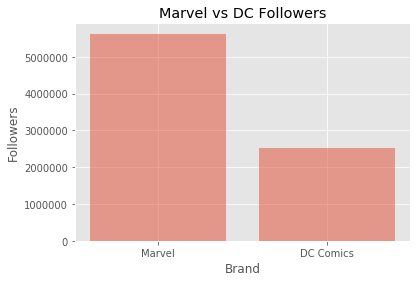

In [10]:
# Dependencies
import tweepy
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from api_keys import twitter_consumer_key, twitter_consumer_key_secret, twitter_access_token, twitter_access_token_secret

from matplotlib import style
style.use('ggplot')

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(twitter_consumer_key, twitter_consumer_key_secret)
auth.set_access_token(twitter_access_token, twitter_access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Marvel
target_user_marvel = "Marvel"

# Get all tweets from home feed
public_tweets_marvel = api.user_timeline(target_user_marvel)

# # Loop through all tweets
# for tweet in public_tweets_marvel:

#     # Utilize JSON dumps to generate a pretty-printed json
#     print(json.dumps(tweet, sort_keys=True, indent=4))

marvel_follower_count = public_tweets_marvel[0]["user"]["followers_count"]
# print(f"Follower Count: {marvel_follower_count}")

# Marvel
target_user_dc = "DCComics"

# Get all tweets from home feed
public_tweets_dc = api.user_timeline(target_user_dc)

# # Loop through all tweets
# for tweet in public_tweets_dc:

#     # Utilize JSON dumps to generate a pretty-printed json
#     print(json.dumps(tweet, sort_keys=True, indent=4))

dc_follower_count = public_tweets_dc[0]["user"]["followers_count"]
# print(f"Follower Count: {dc_follower_count}")

# dc_follower_count

# marvel_follower_count

objects = ('Marvel', 'DC Comics')
y_pos = np.arange(len(objects))
performance = [marvel_follower_count, dc_follower_count]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Followers')
plt.xlabel('Brand')
plt.title('Marvel vs DC Followers')

plt.show()

In [11]:
### Testing observations:

### Can we remove some of the commented out lines (i.e. printing the json)
### How can we make the plot more interesting to look at? Better colors, texture, etc?

### Twitter Sentiment Analysis

##### Q: Which blockbuster currently has more positive sentiment? Marvel's Thor or DC's Justice League?

In [12]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys and Authentication already set
# from api_keys import (twitter_consumer_key, 
#                     twitter_consumer_key_secret, 
#                     twitter_access_token, 
#                     twitter_access_token_secret)

# # Setup Tweepy API Authentication
# auth = tweepy.OAuthHandler(twitter_consumer_key, twitter_consumer_key_secret)
# auth.set_access_token(twitter_access_token, twitter_access_token_secret)
# api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [44]:
# Target Search Term
target_terms = ("Thor", "Justice League")

# "Real Person" Filters
min_tweets = 5
max_tweets = 100000
max_followers = 1000000000
max_following = 50000
lang = "en"

# Array to hold sentiment
sentiment_array = []

# Loop through all target users
for target in target_terms:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 times
    for x in range(1):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=100, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers
                and tweet["user"]["statuses_count"] > min_tweets
                and tweet["user"]["statuses_count"] < max_tweets
                and tweet["user"]["friends_count"] < max_following
                and tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

                # Add each value to the appropriate array
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                
                # Set the new oldest_tweet value
                oldest_tweet = int(tweet["id_str"]) - 1

    # Store the Average Sentiments
    sentiment = {
        "User": target,
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Negative": np.mean(negative_list),
        "Neutral": np.mean(neutral_list),
        "Tweet Count": len(compound_list)
    }

    # Print the Sentiments
    print(sentiment)
    print()

{'User': 'Thor', 'Compound': 0.14664634146341463, 'Positive': 0.12873170731707317, 'Negative': 0.060658536585365859, 'Neutral': 0.81068292682926824, 'Tweet Count': 41}

{'User': 'Justice League', 'Compound': 0.39430746268656719, 'Positive': 0.27370149253731346, 'Negative': 0.068999999999999992, 'Neutral': 0.6573432835820896, 'Tweet Count': 67}



In [62]:


# target search term
target_terms = ("Thor", "Justice League")

# Counter
counter = 1

# "Real Person" Filters
min_tweets = 5
max_tweets = 100000
max_followers = 1000000000
max_following = 50000
lang = "en"

#Empty Dataframe 
sentiments = pd.DataFrame(columns = ["Movie Name","Tweets Ago","Tweet","Compound", "Positive", "Negative", "Neutral", "Date"])

for target in target_terms:
    
    #set counter
    counter = 1
    
    # Loop through 10 times
    for x in range(3):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=100, result_type="recent", max_id=oldest_tweet)

         # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers
                and tweet["user"]["statuses_count"] > min_tweets
                and tweet["user"]["statuses_count"] < max_tweets
                and tweet["user"]["friends_count"] < max_following
                and tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                text = tweet["text"]
                results = analyzer.polarity_scores(text)
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]
                tweets_ago = counter
                when =tweet["created_at"]
                

                # Add sentiments for each tweet into an array
                sentiments=sentiments.append({"Movie Name":target, "Tweets Ago": counter, "Tweet":text,
                                              "Compound":compound, "Positive":pos, "Negative":neg, "Neutral":neu, "Date":when}, ignore_index=True)
          
        
                # Add to counter 
                counter = counter + 1
            

In [63]:
sentiments.head(1000)

,Movie Name,Tweets Ago,Tweet,Compound,Positive,Negative,Neutral,Date
0,Thor,1,RT @buchananbarness: the shots in thor ragnaro...,-0.4019,0.000,0.231,0.769,Tue Dec 05 06:59:10 +0000 2017
1,Thor,2,RT @starscryy: thor: [walking around still dis...,-0.4767,0.000,0.134,0.866,Tue Dec 05 06:59:07 +0000 2017
2,Thor,3,RT @natasharomanoff: this shot from thor ragna...,0.0000,0.000,0.000,1.000,Tue Dec 05 06:59:07 +0000 2017
3,Thor,4,فیلم کلاب | ویدئو: #تحلیل باکس آفیس با #فیلم ک...,0.0000,0.000,0.000,1.000,Tue Dec 05 06:59:02 +0000 2017
4,Thor,5,"『 ᴛʜᴏʀ ᴏᴅɪɴsᴏɴ 』\n— ❛ what are you... thor, go...",0.2732,0.123,0.000,0.877,Tue Dec 05 06:58:55 +0000 2017
5,Thor,6,RT @TypicalGamer: GTA 5 MODS *THOR vs HULK* LI...,0.0000,0.000,0.000,1.000,Tue Dec 05 06:58:53 +0000 2017
6,Thor,7,RT @loki_txt: thor: dont u ever want to talk a...,-0.6728,0.000,0.237,0.763,Tue Dec 05 06:58:11 +0000 2017
7,Thor,8,RT @BraveInBattle: Thor wearing Loki‘s helmet ...,-0.6486,0.000,0.163,0.837,Tue Dec 05 06:58:10 +0000 2017
8,Thor,9,RT @MCU_Tweets: Newly-released official #ThorR...,0.7351,0.246,0.000,0.754,Tue Dec 05 06:58:07 +0000 2017
9,Thor,10,RT @squallisdead: Thor: there's only one thing...,-0.8481,0.000,0.338,0.662,Tue Dec 05 06:58:05 +0000 2017


In [65]:

# Separate Sentiment analysis by movie
Thor = sentiments.loc[sentiments["Movie Name"]== "Thor"]
Just = sentiments.loc[sentiments["Movie Name"]== "Justice League"]

# Get x and y coordinates and average compound for each of the three city types
Thor_compound = Thor["Compound"]
Thor_count = Thor["Tweets Ago"]
Thor_avg_compound = Thor["Compound"].mean()

Just_compound = Just["Compound"]
Just_count = Just["Tweets Ago"]
Just_avg_compound = Just["Compound"].mean()

print(Thor_avg_compound)
print(Just_avg_compound)

0.0141531914894
0.372266197183


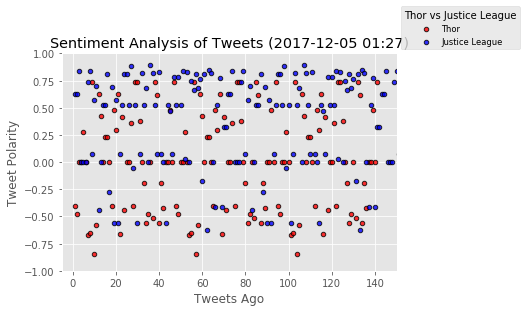

In [66]:
# Build the scatter plots for each news feed
from datetime import datetime

plt.scatter(Thor_count,
            Thor_compound,
            s=20, c="red", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Thor")

plt.scatter(Just_count, 
            Just_compound, 
            s=20, c="blue", 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Justice League")


# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({})".format(now))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim((-5,150))
plt.ylim((-1,1))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title ="Thor vs Justice League", 
                  labelspacing=0.5, bbox_to_anchor=(1, 1))

# Show plot
plt.show()

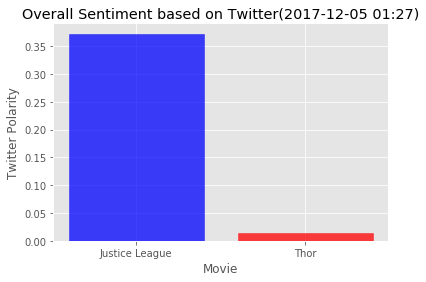

In [67]:
movie_list =["Thor","Justice League"]
compound = [Thor_avg_compound,Just_avg_compound]

plt.title("Overall Sentiment based on Twitter({})".format(now))
plt.xlabel("Movie")
plt.ylabel("Twitter Polarity")

barlist = plt.bar(movie_list, compound,alpha=0.75, align="center")
barlist[0].set_color('red')
barlist[1].set_color('blue')

# Show plot
plt.show()